make the following substitutions : 

$$x_1 = x$$
$$x_2 = x'$$


the linear system can be formulated as :

$$x_1' = x_2$$
$$x_2' = - 5x_1 x_2 - (x_1 +7) sin(\omega t )$$

In [1]:
import numpy as np 
from math import sin
def f(t ,x):
    
   
    
    return np.array([x[0][1], -((5*x[0][1]*x[0][0]) + ((x[0][0]+7)*sin(t)))]).reshape(1,2)



def euler(f, a, b, n, ya):
    """
    Calculate the solution of the initial-value problem from Euler method
    Parameters:
        f: Function f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Initial value
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    vx = np.zeros(n)
    vy = np.zeros((n,2))

    h = (b - a) / n
    x = a
    y = ya

    vx[0] = x
    vy[0] = y

    fxy = f(x, y)
   
    print("i: {:03d}\t t: {:.6f}\t x: {:.6f}\t x': {:.6f} \n".format(0, x, y[0][0], y[0][1]), end="")

    for i in range(0, n):
        
        x = a + (i + 1) * h
        y = (y+ (h * fxy)).reshape((1,2))
        
        
        
        fxy = f(x, y)
        print("i: {:03d}\t t: {:.6f}\t x: {:.6f}\t x': {:.6f} \n".format(i + 1, x, y[0][0], y[0][1]), end="")
        vx[i] = x
        vy[i] = y
        

    return [vx, vy]

In [2]:
t, X = euler(f, 1, 15, 150, np.array([3, 1]).reshape((1,2)) )

i: 000	 t: 1.000000	 x: 3.000000	 x': 1.000000 
i: 001	 t: 1.093333	 x: 3.093333	 x': -1.185373 
i: 002	 t: 1.186667	 x: 2.982699	 x': -0.310911 
i: 003	 t: 1.280000	 x: 2.953680	 x': -0.741965 
i: 004	 t: 1.373333	 x: 2.884430	 x': -0.609259 
i: 005	 t: 1.466667	 x: 2.827566	 x': -0.693775 
i: 006	 t: 1.560000	 x: 2.762814	 x': -0.690589 
i: 007	 t: 1.653333	 x: 2.698359	 x': -0.711347 
i: 008	 t: 1.746667	 x: 2.631966	 x': -0.717693 
i: 009	 t: 1.840000	 x: 2.564982	 x': -0.721302 
i: 010	 t: 1.933333	 x: 2.497660	 x': -0.718488 
i: 011	 t: 2.026667	 x: 2.430601	 x': -0.709866 
i: 012	 t: 2.120000	 x: 2.364347	 x': -0.694982 
i: 013	 t: 2.213333	 x: 2.299482	 x': -0.673640 
i: 014	 t: 2.306667	 x: 2.236609	 x': -0.645626 
i: 015	 t: 2.400000	 x: 2.176351	 x': -0.610770 
i: 016	 t: 2.493333	 x: 2.119345	 x': -0.568960 
i: 017	 t: 2.586667	 x: 2.066242	 x': -0.520160 
i: 018	 t: 2.680000	 x: 2.017694	 x': -0.464435 
i: 019	 t: 2.773333	 x: 1.974347	 x': -0.401978 
i: 020	 t: 2.866667	 

In [3]:
def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

In [4]:
f = [lambda x, y : y[1], lambda x, y : -((5*y[1]*y[0]) + ((y[0]+7)*(sin(x))))]

In [5]:
t_, X_ = rk4_system(f, 0, 15, 150, np.array([3, 1]))

In [6]:
X.shape

(150, 2)

In [7]:
X_.shape

(2, 151)

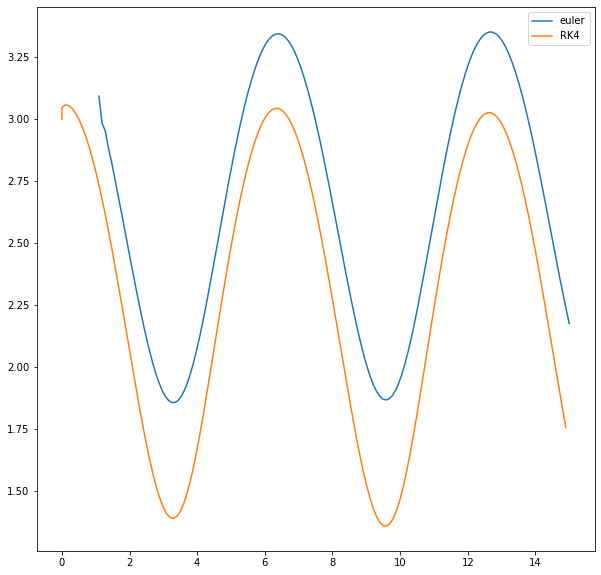

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

plt.plot(t, X[:, 0], label='euler')
plt.plot(t_, X_[0, :], label='RK4')

plt.legend()